# Every single one combined!!

Extracting EDF parameters from e:\WEBSITE\EDF_analysis\EDF+\Zacker\Zacker.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139775  =      0.000 ...  1091.992 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 32 components
Fitting ICA took 8.4s.


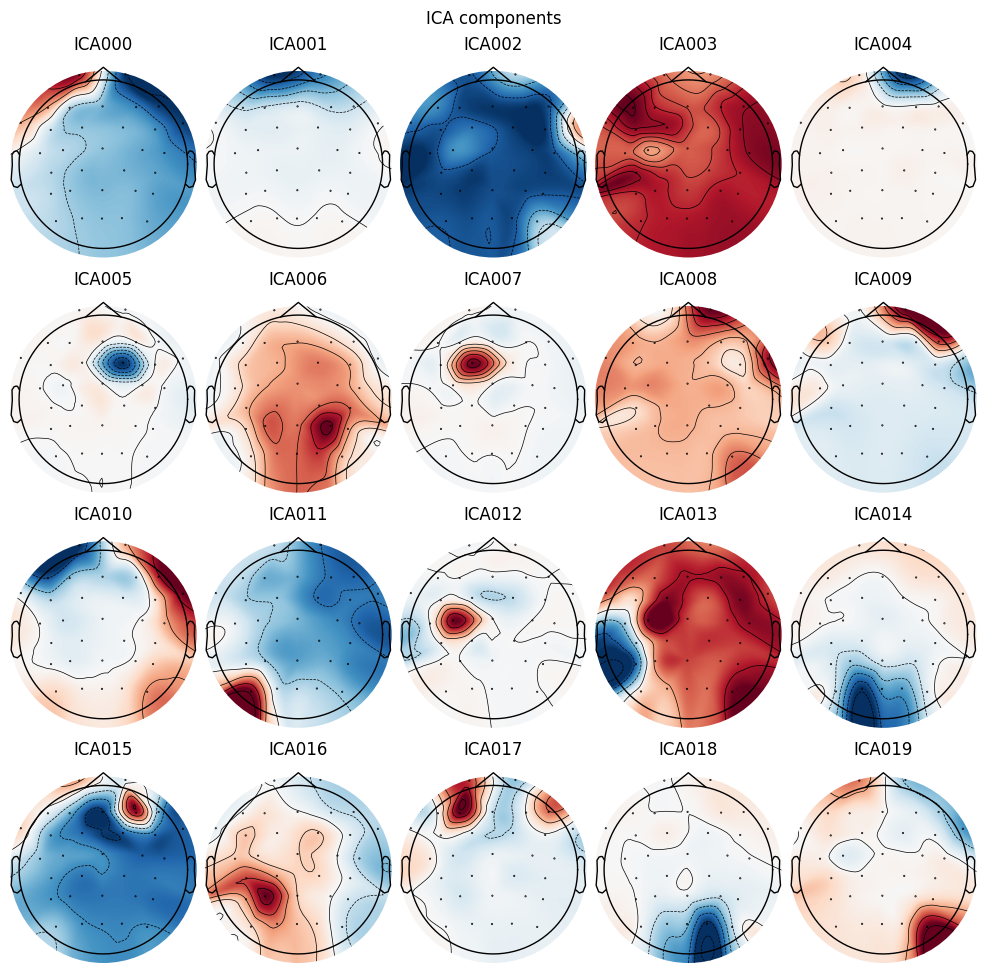

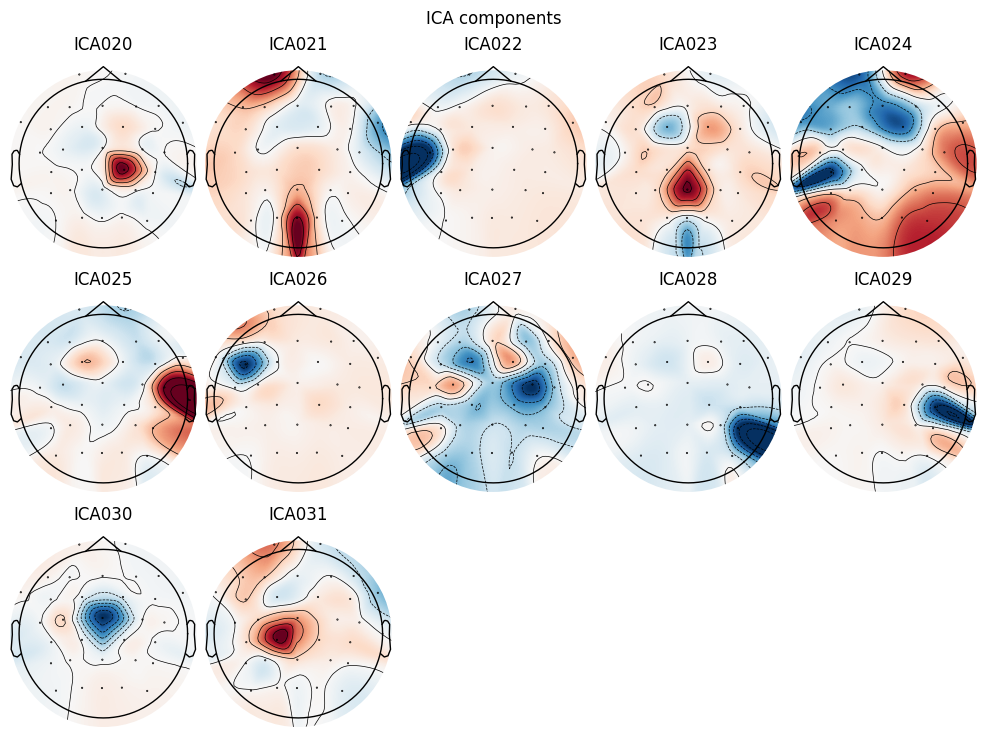

Using EOG channel: Fp1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)



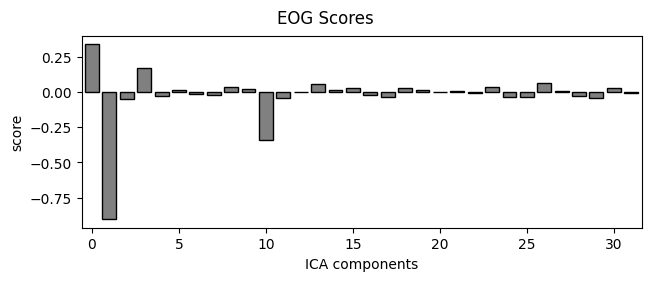

Effective window size : 16.000 (s)


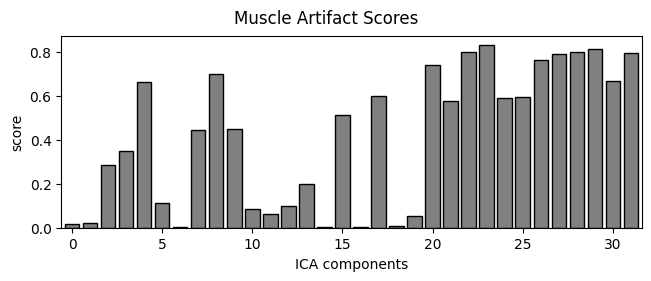

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 24 ICA components
    Projecting back using 32 PCA components
Raw file


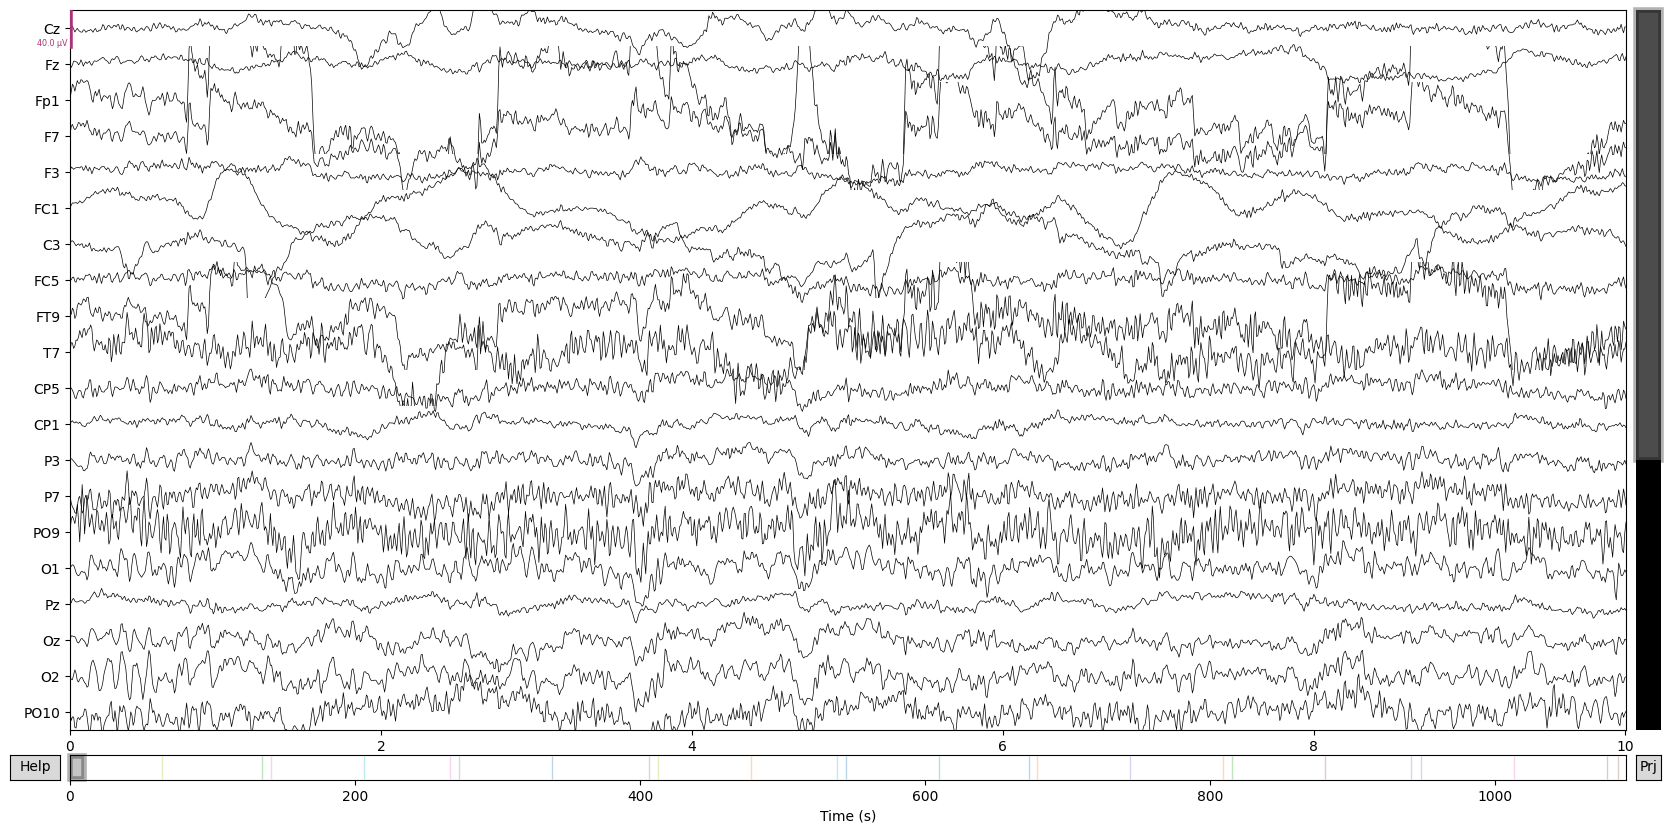

Cleaned file


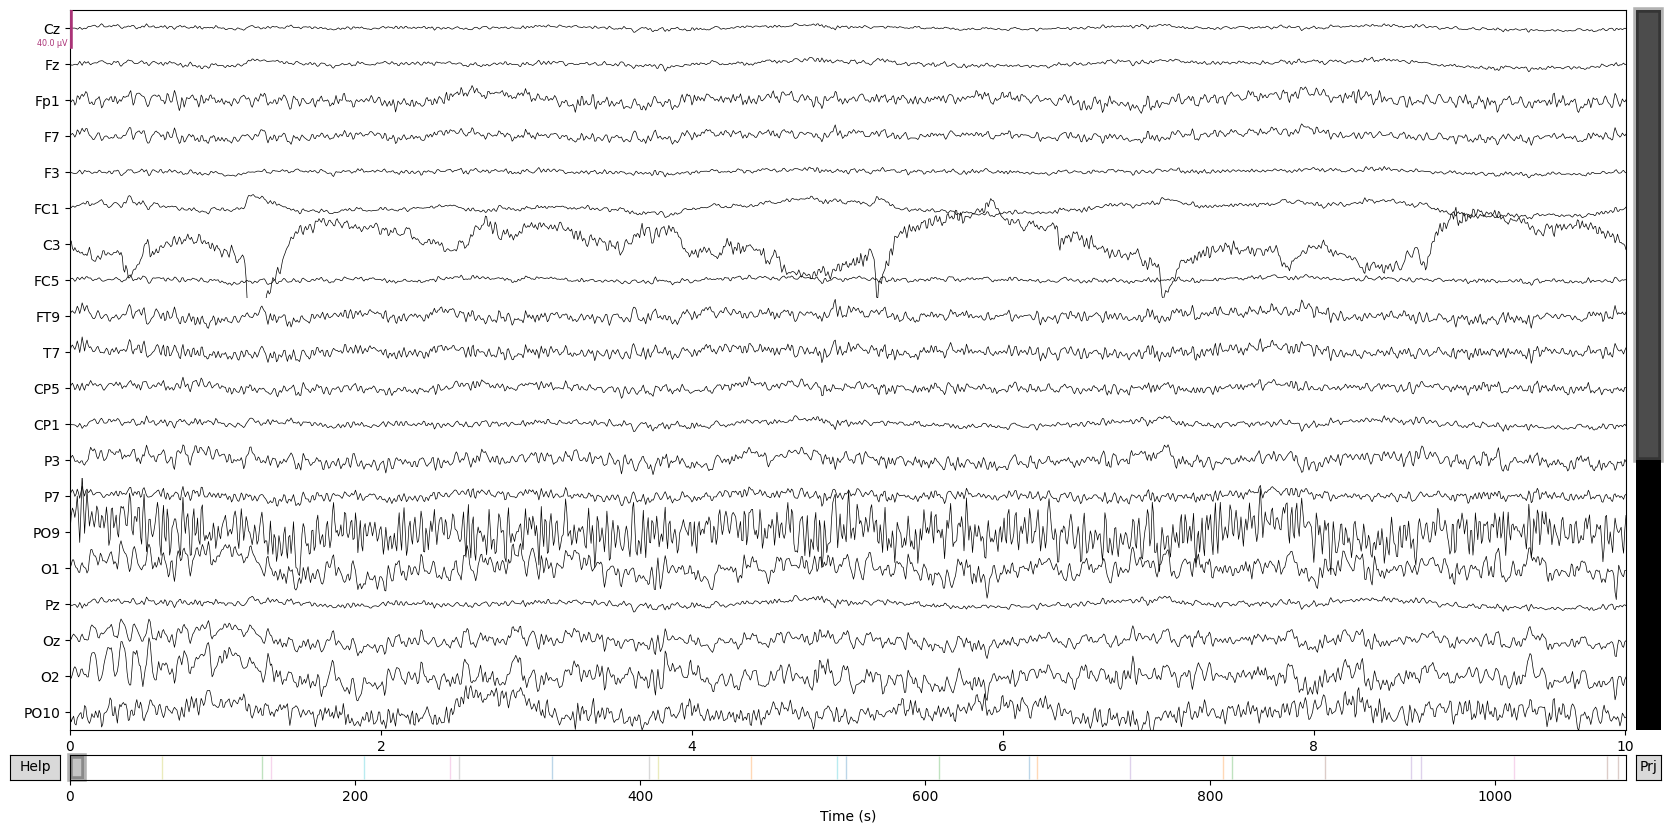

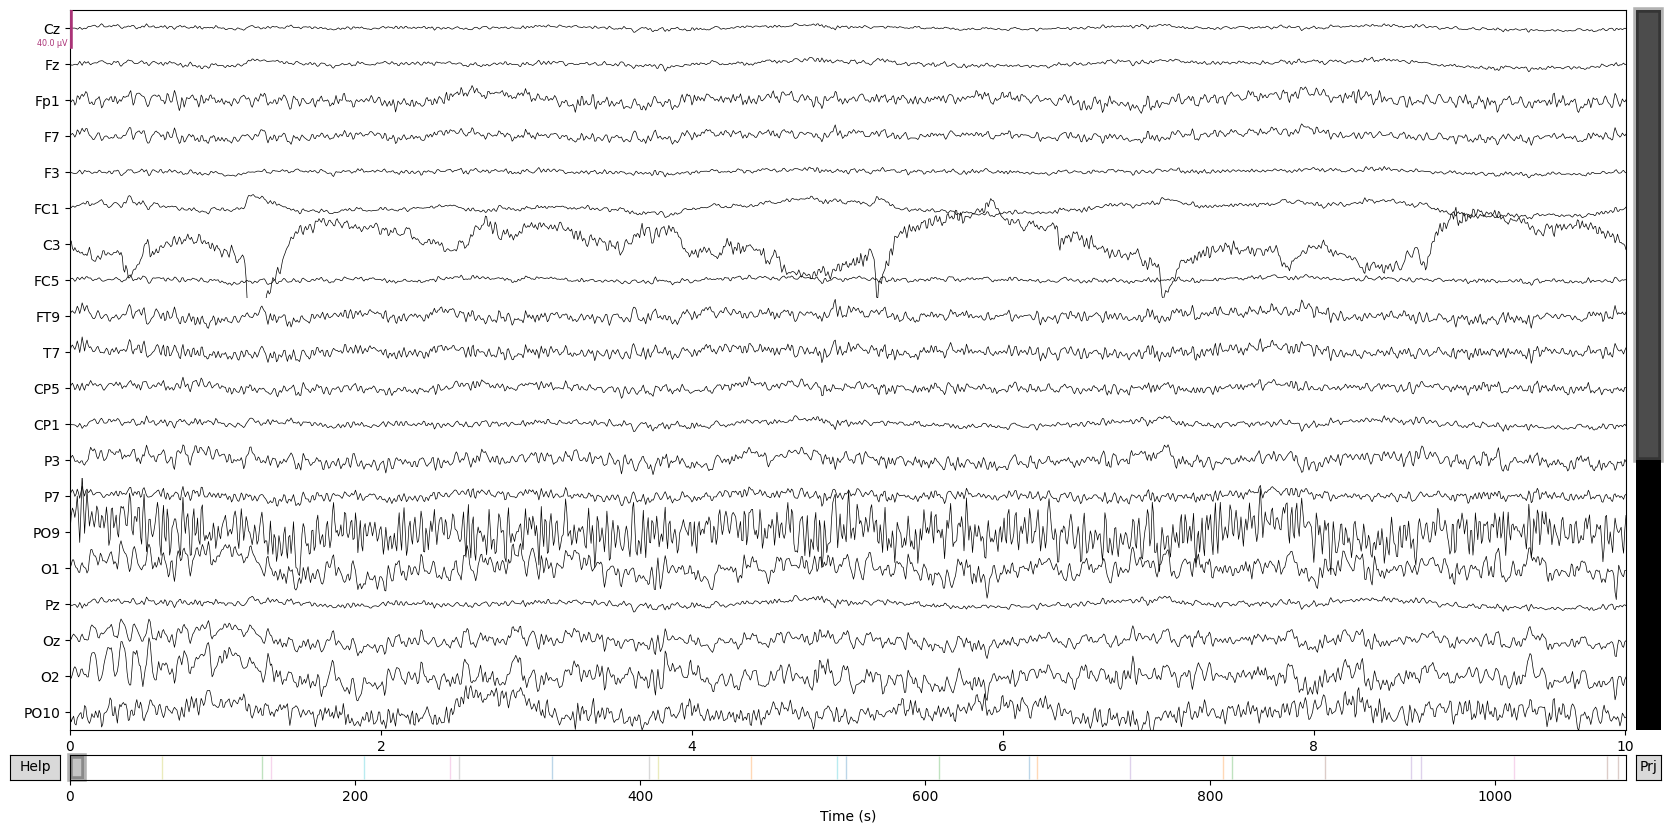

In [9]:
import mne
from mne.preprocessing import ICA

# Read your EDF file
raw = mne.io.read_raw_edf(r'EDF+\Zacker\Zacker.edf', preload=True, verbose=True, infer_types=True)
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Select only EEG channels
raw.pick_channels(eeg_channels)

# Set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

# Apply preprocessing steps
raw.set_eeg_reference('average', projection=True)  # set EEG average reference
raw.filter(l_freq=0.5, h_freq=40)  # Apply band-pass filter

# Set up ICA
ica = ICA(n_components=32, random_state=97, max_iter=800)

# Fit ICA on the raw EEG data
ica.fit(raw)

# Plot ICA components to manually inspect and identify components
ica.plot_components()

# Use built-in methods to automatically find EOG-like components
eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name='Fp1')  # assuming Fp1 is most likely to capture eye blinks
ica.plot_scores(eog_scores, title='EOG Scores')

# Use built-in methods to automatically find muscle artifact components
muscle_noise_indices, muscle_noise_scores = ica.find_bads_muscle(raw)
ica.plot_scores(muscle_noise_scores, title='Muscle Artifact Scores')

# Combine the indices of bad components
ica.exclude = list(set(eog_indices + muscle_noise_indices))

# Apply the ICA solution to the raw data to remove the artifacts
raw_clean = ica.apply(raw.copy())

# Plot the raw and cleaned data for comparison using MNE's plotting functions
print('Raw file')
raw.plot(title='Raw EEG Data')
print('Cleaned file')
raw_clean.plot(title='Cleaned EEG Data')


## The original code 

Extracting EDF parameters from e:\WEBSITE\EDF_analysis\EDF+\Zacker\Zacker.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139775  =      0.000 ...  1091.992 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 32 components
Fitting ICA took 9.7s.


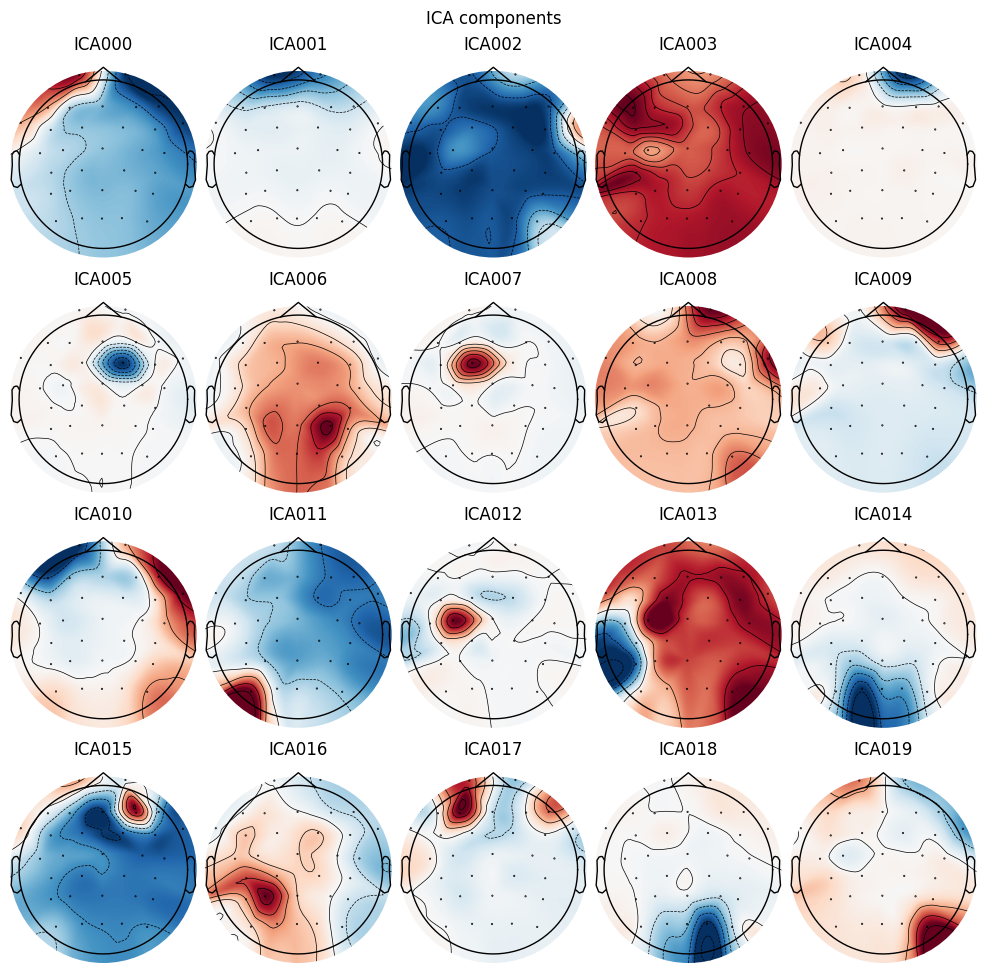

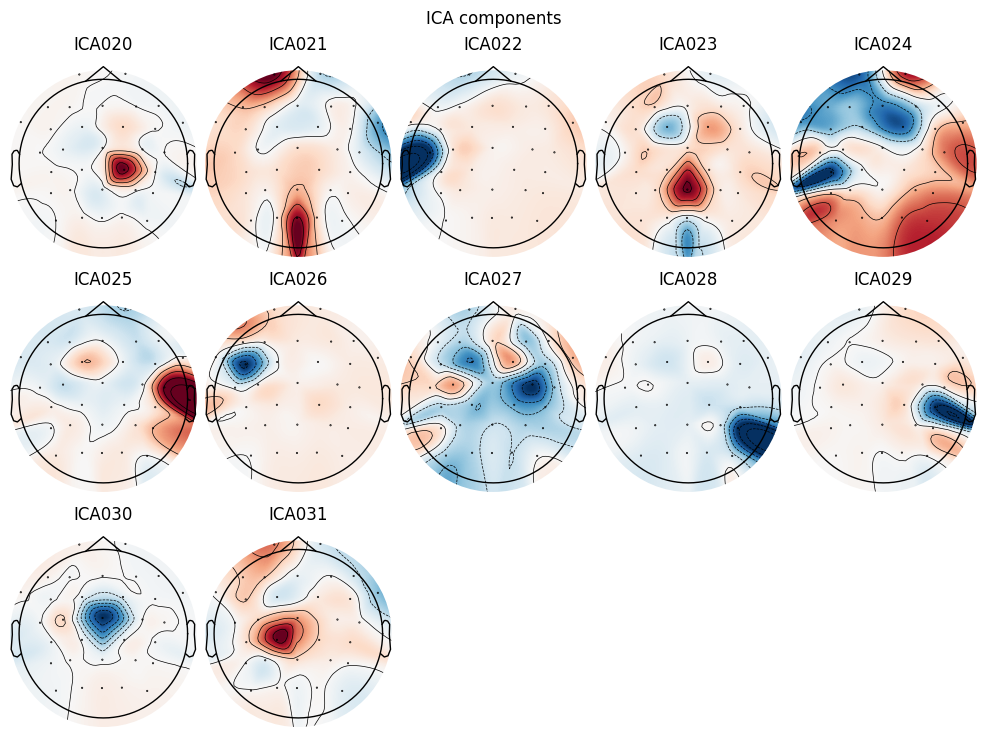

Using EOG channel: Fp1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


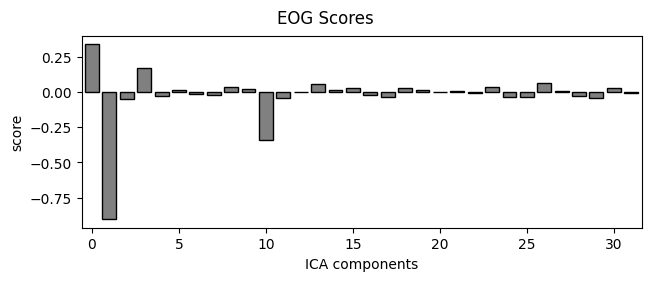

Effective window size : 16.000 (s)


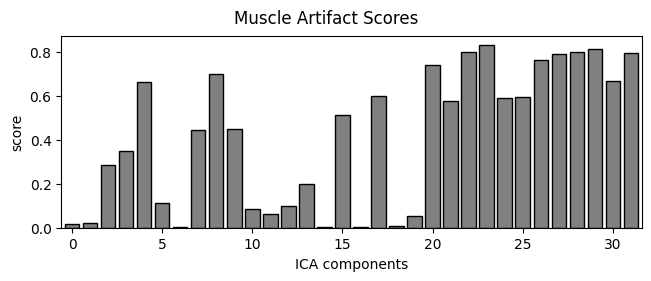

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 24 ICA components
    Projecting back using 32 PCA components
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


C:\Users\micha\AppData\Local\Temp\ipykernel_3908\1171006138.py:47: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(ax=axs[0], fmax=45)
c:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Plotting power spectral density (dB=True).


C:\Users\micha\AppData\Local\Temp\ipykernel_3908\1171006138.py:51: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_clean.plot_psd(ax=axs[1], fmax=45)
C:\Users\micha\AppData\Local\Temp\ipykernel_3908\1171006138.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


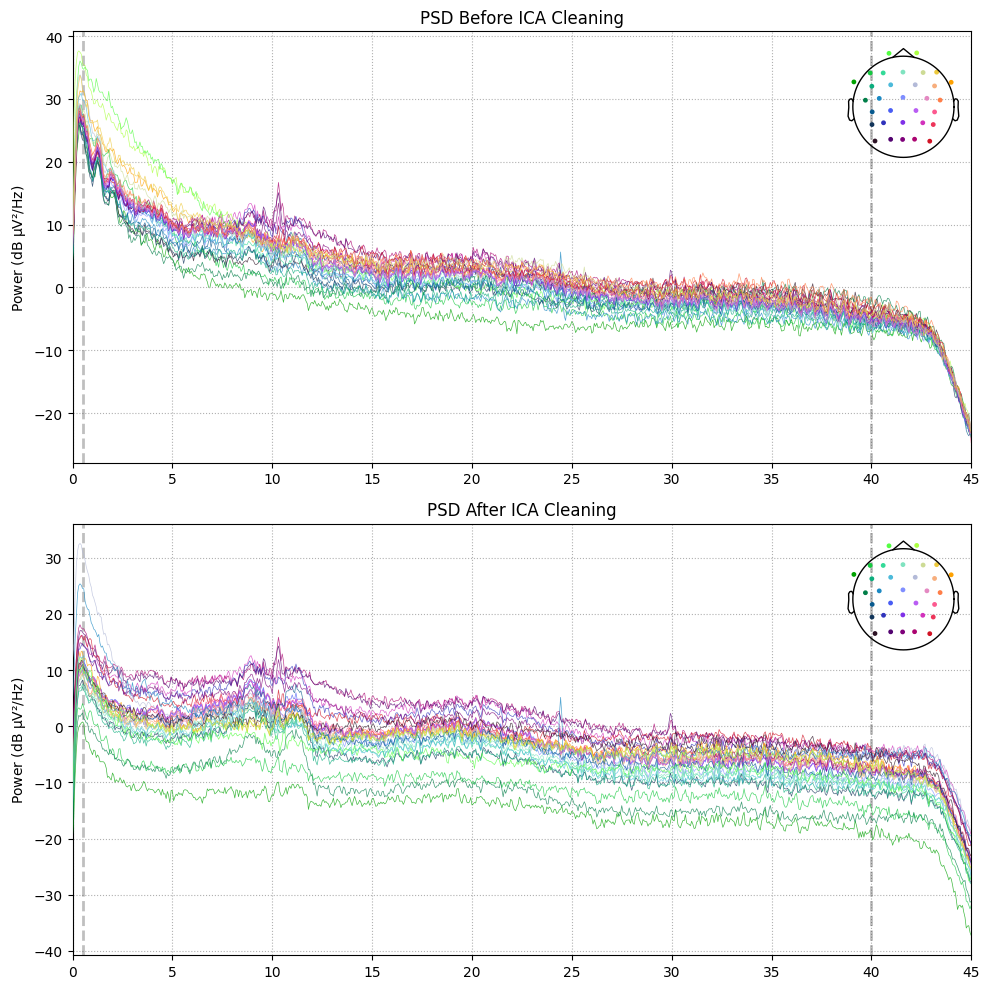

In [14]:
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf(r'EDF+\Zacker\Zacker.edf', preload=True, verbose=True, infer_types=True)
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Select only EEG channels
raw.pick_channels(eeg_channels)

# Set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

# Apply preprocessing steps
raw.set_eeg_reference('average', projection=True)  # set EEG average reference
raw.filter(l_freq=0.5, h_freq=40)  # Apply band-pass filter

# Set up ICA
ica = ICA(n_components=32, random_state=97, max_iter=800)

# Fit ICA on the raw EEG data
ica.fit(raw)

# Plot ICA components to manually inspect and identify components
ica.plot_components()

# Use built-in methods to automatically find EOG-like components
eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name='Fp1')  # assuming Fp1 is most likely to capture eye blinks
ica.plot_scores(eog_scores, title='EOG Scores')

# Use built-in methods to automatically find muscle artifact components
muscle_noise_indices, muscle_noise_scores = ica.find_bads_muscle(raw)
ica.plot_scores(muscle_noise_scores, title='Muscle Artifact Scores')

# Combine the indices of bad components
ica.exclude = list(set(eog_indices + muscle_noise_indices))

# Apply the ICA solution to the raw data to remove the artifacts
raw_clean = ica.apply(raw.copy())

# Plot the PSD before and after ICA cleaning
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Before ICA cleaning
raw.plot_psd(ax=axs[0], fmax=45)
axs[0].set_title('PSD Before ICA Cleaning')

# After ICA cleaning
raw_clean.plot_psd(ax=axs[1], fmax=45)
axs[1].set_title('PSD After ICA Cleaning')

plt.tight_layout()
plt.show()


## Note how the above really reduces the peak on the green eye channel, always the one I saw in the vectors too!!! HUGE db reduction.  
## 

In [ ]:
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf(r'EDF+\Zacker\Zacker.edf', preload=True, verbose=True, infer_types=True)
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Select only EEG channels
raw.pick_channels(eeg_channels)

# Set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

# Apply preprocessing steps
raw.set_eeg_reference('average', projection=True)  # set EEG average reference
raw.filter(l_freq=0.5, h_freq=40)  # Apply band-pass filter

# Set up ICA
ica = ICA(n_components=32, random_state=97, max_iter=800)

# Fit ICA on the raw EEG data
ica.fit(raw)

# Plot ICA components to manually inspect and identify components
ica.plot_components()

# Use built-in methods to automatically find EOG-like components
eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name='Fp1')  # assuming Fp1 is most likely to capture eye blinks
ica.plot_scores(eog_scores, title='EOG Scores')

# Use built-in methods to automatically find muscle artifact components
muscle_noise_indices, muscle_noise_scores = ica.find_bads_muscle(raw)
ica.plot_scores(muscle_noise_scores, title='Muscle Artifact Scores')

# Combine the indices of bad components
ica.exclude = list(set(eog_indices + muscle_noise_indices))

# Apply the ICA solution to the raw data to remove the artifacts
raw_clean = ica.apply(raw.copy())

# Plot the PSD before and after ICA cleaning
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Before ICA cleaning
raw.plot_psd(ax=axs[0], fmin = 0.5, fmax=45)
axs[0].set_title('PSD Before ICA Cleaning')

# After ICA cleaning
raw_clean.plot_psd(ax=axs[1], fmin = 0.5, fmax=45)
axs[1].set_title('PSD After ICA Cleaning')

plt.tight_layout()
plt.show()


Extracting EDF parameters from e:\WEBSITE\EDF_analysis\EDF+\Zacker\Zacker.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139775  =      0.000 ...  1091.992 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s


Dropped 0/1092 epochs
No channels 'grad' found. Skipping.
No channels 'mag' found. Skipping.
Adding projection: eeg-Raw-0.000-1092.000-PCA-01 (exp var=53.5%)
1 projection items deactivated
Created an SSP operator (subspace dimension = 2)
2 projection items activated
SSP projectors applied...


[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.1s


Fitting ICA to data using 32 channels (please be patient, this may take a while)
    Applying projection operator with 2 vectors (pre-whitener computation)
    Applying projection operator with 2 vectors (pre-whitener application)
Selecting by number: 32 components
    Applying projection operator with 2 vectors (pre-whitener application)
Fitting ICA took 13.8s.


C:\Users\micha\AppData\Local\Temp\ipykernel_9672\223462726.py:33: RuntimeWarning: Using n_components=32 (resulting in n_components_=32) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (9.3e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 30
  ica.fit(raw)


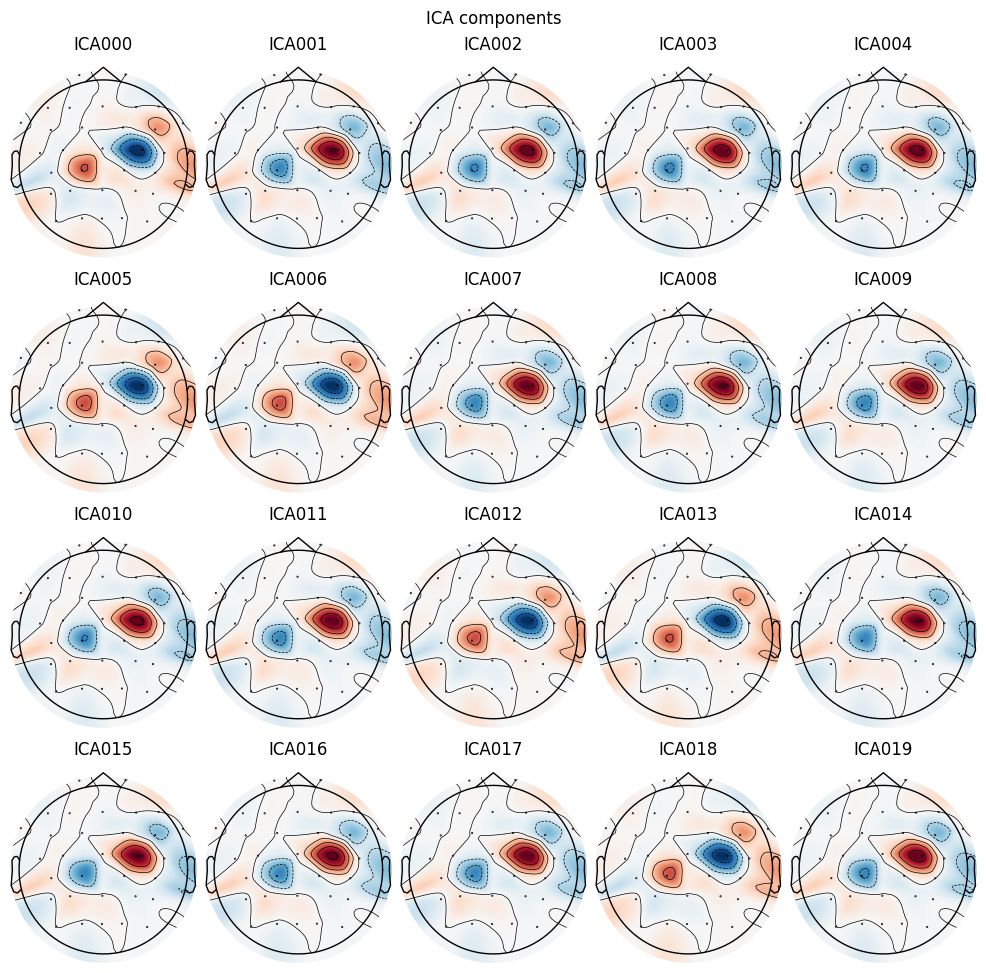

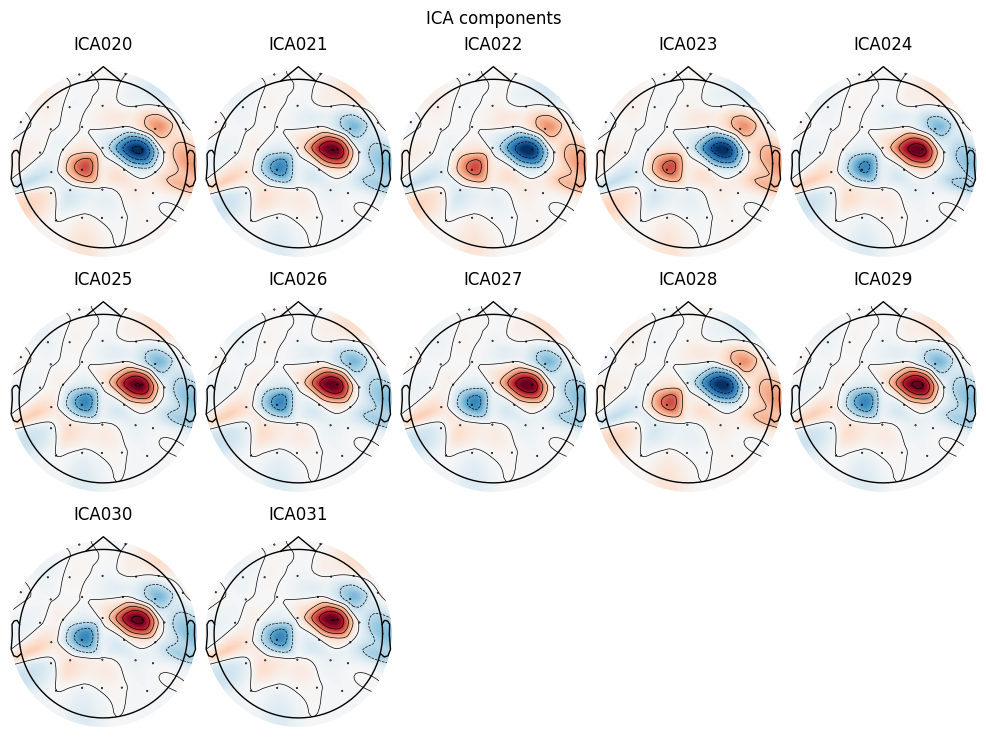

Using EOG channel: Fp1
    Applying projection operator with 2 vectors (pre-whitener application)
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


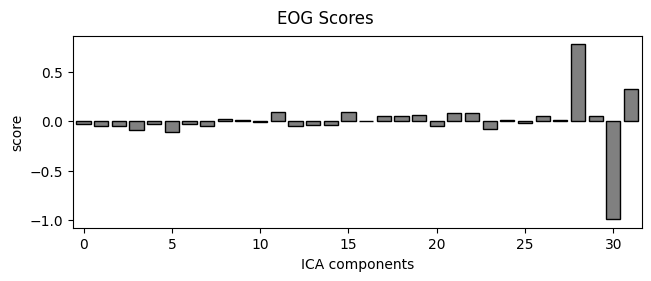

    Applying projection operator with 2 vectors (pre-whitener application)
Effective window size : 16.000 (s)


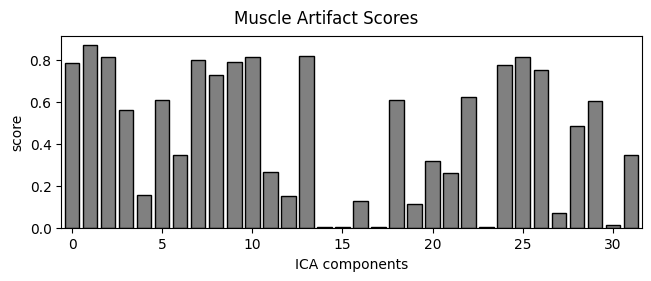

Applying ICA to Raw instance
    Applying projection operator with 2 vectors (pre-whitener application)
    Transforming to ICA space (32 components)
    Zeroing out 26 ICA components
    Projecting back using 32 PCA components
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\micha\AppData\Local\Temp\ipykernel_9672\223462726.py:56: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(ax=axs[0], fmax=45)
c:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


C:\Users\micha\AppData\Local\Temp\ipykernel_9672\223462726.py:60: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_clean.plot_psd(ax=axs[1], fmax=45)
C:\Users\micha\AppData\Local\Temp\ipykernel_9672\223462726.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


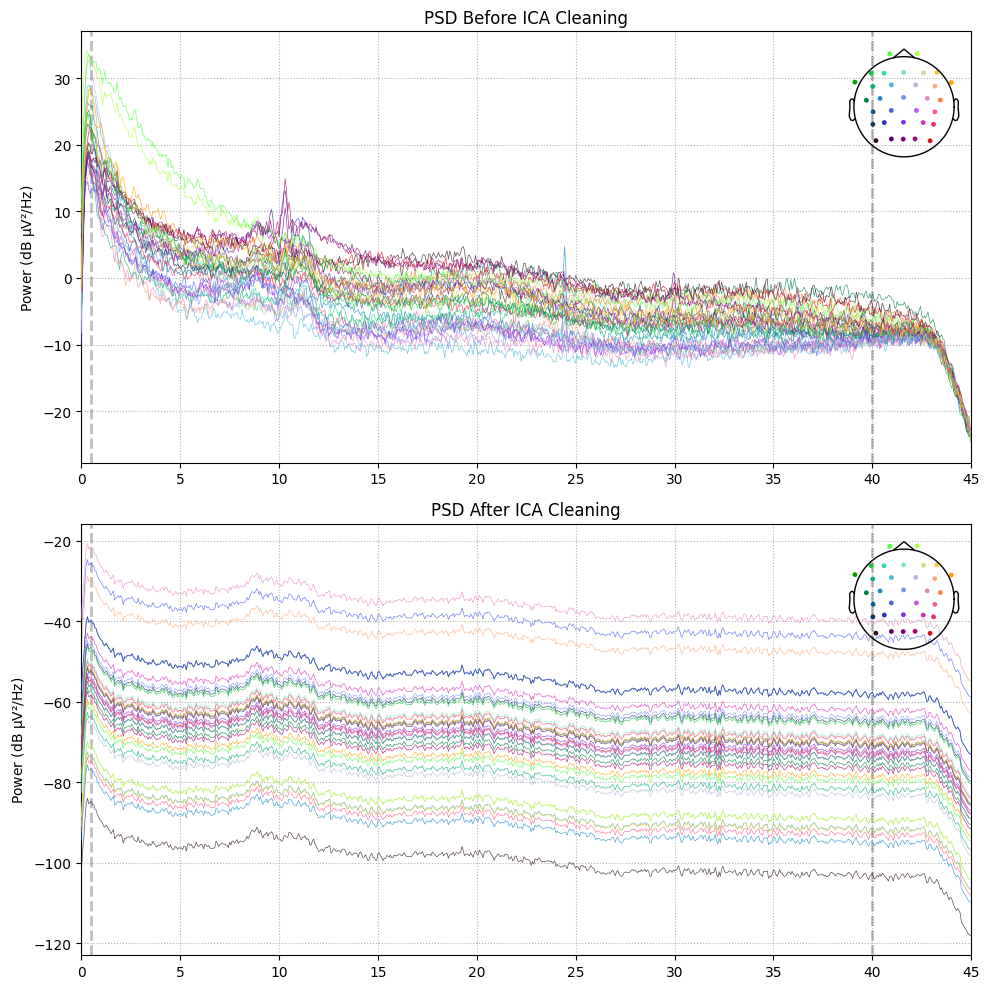

In [2]:
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf(r'EDF+\Zacker\Zacker.edf', preload=True, verbose=True, infer_types=True)
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Select only EEG channels
raw.pick_channels(eeg_channels)

# Set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

# Apply preprocessing steps
raw.set_eeg_reference('average', projection=True)  # set EEG average reference
raw.filter(l_freq=0.5, h_freq=40)  # Apply band-pass filter

# Compute projections for artifact removal (e.g., EOG, ECG)
projs = mne.compute_proj_raw(raw, n_grad=0, n_mag=0, n_eeg=1)  # Example: compute one EEG projection

# Add the computed projections to the raw data
raw.add_proj(projs)

# Apply the projections
raw.apply_proj()

# Set up ICA
ica = ICA(n_components=32, random_state=97, max_iter=800)

# Fit ICA on the raw EEG data
ica.fit(raw)

# Plot ICA components to manually inspect and identify components
ica.plot_components()

# Use built-in methods to automatically find EOG-like components
eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name='Fp1')  # assuming Fp1 is most likely to capture eye blinks
ica.plot_scores(eog_scores, title='EOG Scores')

# Use built-in methods to automatically find muscle artifact components
muscle_noise_indices, muscle_noise_scores = ica.find_bads_muscle(raw)
ica.plot_scores(muscle_noise_scores, title='Muscle Artifact Scores')

# Combine the indices of bad components
ica.exclude = list(set(eog_indices + muscle_noise_indices))

# Apply the ICA solution to the raw data to remove the artifacts
raw_clean = ica.apply(raw.copy())

# Plot the PSD before and after ICA cleaning
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Before ICA cleaning
raw.plot_psd(ax=axs[0], fmax=45)
axs[0].set_title('PSD Before ICA Cleaning')

# After ICA cleaning
raw_clean.plot_psd(ax=axs[1], fmax=45)
axs[1].set_title('PSD After ICA Cleaning')

plt.tight_layout()
plt.show()


In [6]:
regexp = r"(MEG [12][45][123]1|EEG 00.)"
artifact_picks = mne.pick_channels_regexp(eeg_channels, regexp=regexp)
raw.plot(order=artifact_picks, n_channels=len(artifact_picks))

RuntimeError: No channels found to plot